In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/kaggle/input/upi-transaction-fraud-dataset/UPI apps transaction data in 2021.csv')

In [3]:
df.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021


In [4]:
df.shape

(654, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UPI Banks                 654 non-null    object 
 1   Volume (Mn) By Costumers  654 non-null    float64
 2   Value (Cr) by Costumers   654 non-null    float64
 3   Volume (Mn)               654 non-null    float64
 4   Value (Cr)                654 non-null    float64
 5   Month                     654 non-null    int64  
 6   Year                      654 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 35.9+ KB


In [6]:
df['UPI Banks'].value_counts()

UPI Banks
Yes Bank Apps                12
Airtel Payments Bank Apps    12
Paytm Payments Bank App      12
PhonePe                      12
Punjab National Bank App     12
                             ..
Khalijeb                      1
Freecharge                    1
Other Bank Apps               1
Goibibo                       1
WhatsApp*                     1
Name: count, Length: 69, dtype: int64

In [7]:
df['Year'].unique()

array([2021])

In [8]:
df.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021


In [9]:
df['Month'].value_counts()

Month
12    58
9     58
8     57
11    56
1     56
10    54
3     54
7     54
2     54
5     52
4     51
6     50
Name: count, dtype: int64

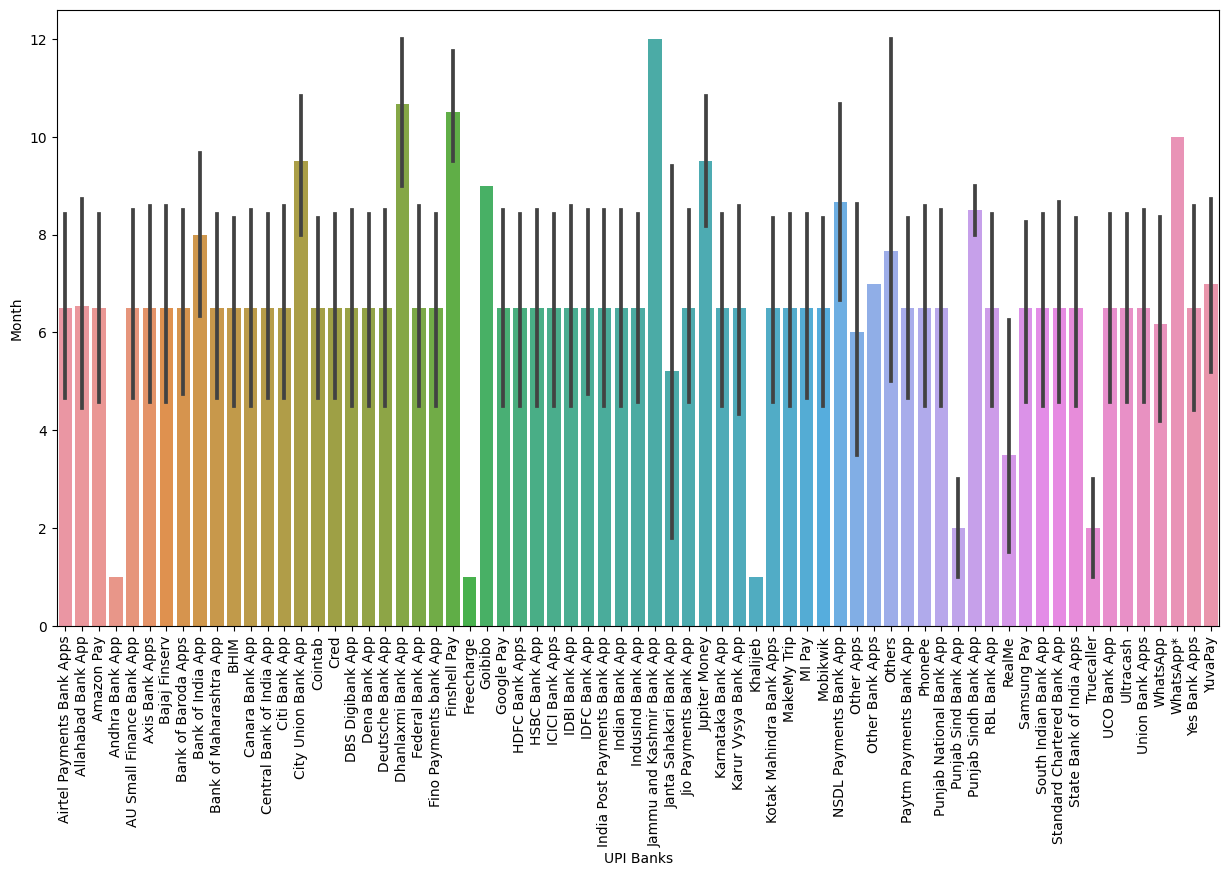

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='UPI Banks',y='Month')
plt.tick_params(axis='x',rotation=90)

In [11]:
df.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021


In [12]:
df['Month']=df['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])

In [13]:
bank_wise = df.groupby(['UPI Banks'], as_index=False)[
    ['Volume (Mn) By Costumers', 'Value (Cr) by Costumers', 'Volume (Mn)', 'Value (Cr)']
].agg(sum)


<ipython-input-13-d6ff6d4e6fe5>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ].agg(sum)


In [14]:
bank_wise

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr)
0,AU Small Finance Bank App,1.07,438.59,1.07,438.59
1,Airtel Payments Bank Apps,67.37,13317.81,109.80,40586.97
2,Allahabad Bank App,0.32,88.39,0.32,88.39
3,Amazon Pay,704.15,60962.34,704.15,60962.34
4,Andhra Bank App,0.02,13.32,0.02,13.32
...,...,...,...,...,...
64,Union Bank Apps,4.41,1752.70,4.41,1752.70
65,WhatsApp,9.54,735.73,9.54,735.73
66,WhatsApp*,2.60,104.19,2.60,104.19
67,Yes Bank Apps,292.50,61298.95,293.08,61299.32


In [15]:
bank_wise_sort=bank_wise.sort_values(by=['Value (Cr)'],ascending=False)[:5]

In [16]:
bank_wise_sort

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr)
51,PhonePe,17470.81,3365727.16,17470.81,3365727.06
26,Google Pay,13541.88,2737496.81,13541.88,2737496.81
50,Paytm Payments Bank App,4827.38,573899.84,5640.23,669189.79
16,Cred,80.96,97013.60,80.96,97013.60
6,BHIM,289.43,91106.89,289.43,91106.89


In [17]:
month_wise = df.groupby(['Month'], as_index=False)[
    ['Volume (Mn) By Costumers', 'Value (Cr) by Costumers', 'Volume (Mn)', 'Value (Cr)']
].agg(sum)


<ipython-input-17-5af5d91fc0fc>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ].agg(sum)


In [18]:
month_wise

,Month,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr)
0,April,2564.99,493455.56,2702.49,509080.17
1,August,3469.76,638897.00,3627.60,646954.27
2,December,4501.65,826616.14,4658.05,846540.56
3,February,2229.15,424929.06,2340.15,429144.98
4,January,2228.26,430970.17,2350.74,435112.54
5,July,3176.84,606092.85,3311.52,612373.52
6,June,2748.39,547216.30,2861.04,553234.58
7,March,2660.57,504717.04,2785.05,509450.13
8,May,2477.16,490495.93,2591.12,498661.49
9,November,4110.86,768181.37,4273.67,786538.10


In [19]:
month_wise_sort=month_wise.sort_values(by=['Value (Cr)'],ascending=False)


In [20]:
month_wise_sort

,Month,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr)
2,December,4501.65,826616.14,4658.05,846540.56
10,October,4146.57,771227.85,4306.89,790469.39
9,November,4110.86,768181.37,4273.67,786538.10
11,September,3592.26,654114.23,3732.73,664204.90
1,August,3469.76,638897.00,3627.60,646954.27
5,July,3176.84,606092.85,3311.52,612373.52
6,June,2748.39,547216.30,2861.04,553234.58
7,March,2660.57,504717.04,2785.05,509450.13
0,April,2564.99,493455.56,2702.49,509080.17
8,May,2477.16,490495.93,2591.12,498661.49


([<matplotlib.patches.Wedge at 0x7ba53a87dae0>,
 [Text(1.0255247887764931, 0.39786795247283924, 'December'),
  Text(0.5161643753806447, 0.9713775463679964, 'October'),
  Text(-0.2113163324697974, 1.0795116523833888, 'November'),
  Text(-0.8112992530995682, 0.7428280567668961, 'September'),
  Text(-1.086542973348301, 0.1715353230895422, 'August'),
  Text(-1.0154050712985363, -0.42302782554013474, 'July'),
  Text(-0.696480977328027, -0.8514189616282906, 'June'),
  Text(-0.2583143386023785, -1.0692397778199314, 'March'),
  Text(0.2174019967900946, -1.0783025418646104, 'April'),
  Text(0.6387204155232176, -0.8955647552208876, 'May'),
  Text(0.9327828154542568, -0.5830233436091818, 'January'),
  Text(1.081041700760612, -0.2033441447807231, 'February')],
 [Text(0.5593771575144507, 0.21701888316700318, '12%'),
  Text(0.28154420475307895, 0.529842298018907, '11%'),
  Text(-0.11526345407443493, 0.5888245376636665, '11%'),
  Text(-0.44252686532703717, 0.40517894005467053, '9%'),
  Text(-0.592659

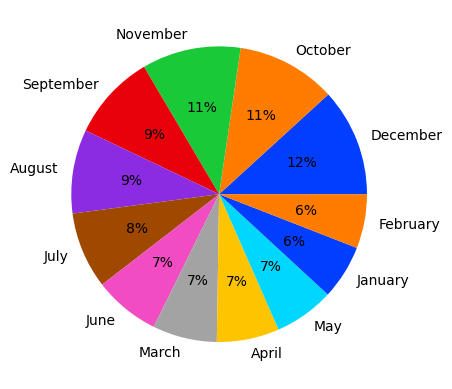

In [21]:
data=month_wise_sort['Volume (Mn)']
label=month_wise_sort['Month']
color=sns.color_palette('bright')
plt.pie(data,labels=label,colors=color,autopct='%0.f%%')

([<matplotlib.patches.Wedge at 0x7ba53aca9ae0>,
 [Text(0.05684142138133077, 1.0985304059585015, 'PhonePe'),
  Text(-0.4671783040111732, -0.9958636614824561, 'Google Pay'),
  Text(0.9798022979096614, -0.49998745685361684, 'Paytm Payments Bank App'),
  Text(1.091275870349251, -0.13826414861953457, 'Cred'),
  Text(1.0990701133559013, -0.045220414945536, 'BHIM')],
 [Text(0.031004411662544053, 0.5991984032500917, '48%'),
  Text(-0.2548245294606399, -0.5431983608086124, '39%'),
  Text(0.5344376170416334, -0.2727204310110637, '10%'),
  Text(0.5952413838268641, -0.07541680833792794, '1%'),
  Text(0.5994927891032188, -0.024665680879383266, '1%')])

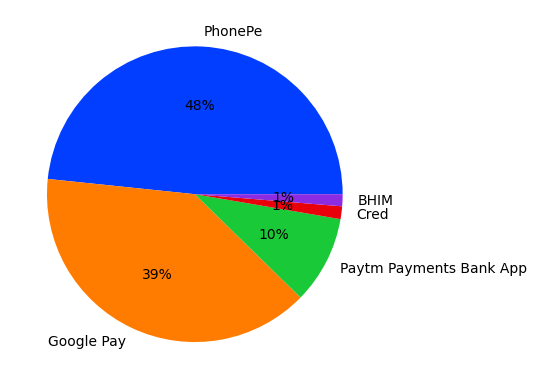

In [22]:
data=bank_wise_sort['Value (Cr)']
label=bank_wise_sort['UPI Banks']
color=sns.color_palette('bright')
plt.pie(data,labels=label,colors=color,autopct='%0.f%%')

In [23]:
df.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,December,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,November,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,October,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,September,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,August,2021


In [24]:
df['Month']=df['Month'].replace(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])

<ipython-input-24-7297f2d1a366>:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['Month']=df['Month'].replace(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])


In [25]:
df.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,December,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,December,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,December,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,December,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,December,2021


In [26]:
upi=pd.read_csv('/kaggle/input/upi-transaction-fraud-dataset/UPI apps transaction data in 2021.csv',usecols=['UPI Banks'])

In [27]:
upi

,UPI Banks
0,Airtel Payments Bank Apps
1,Airtel Payments Bank Apps
2,Airtel Payments Bank Apps
3,Airtel Payments Bank Apps
4,Airtel Payments Bank Apps
...,...
649,YuvaPay
650,YuvaPay
651,YuvaPay
652,YuvaPay


In [28]:
upi_banks=pd.get_dummies(upi)

In [29]:
upi_banks

,UPI Banks_AU Small Finance Bank App,UPI Banks_Airtel Payments Bank Apps,UPI Banks_Allahabad Bank App,UPI Banks_Amazon Pay,UPI Banks_Andhra Bank App,UPI Banks_Axis Bank Apps,UPI Banks_BHIM,UPI Banks_Bajaj Finserv,UPI Banks_Bank of Baroda Apps,UPI Banks_Bank of India App,...,UPI Banks_Standard Chartered Bank App,UPI Banks_State Bank of India Apps,UPI Banks_Truecaller,UPI Banks_UCO Bank App,UPI Banks_Ultracash,UPI Banks_Union Bank Apps,UPI Banks_WhatsApp,UPI Banks_WhatsApp*,UPI Banks_Yes Bank Apps,UPI Banks_YuvaPay
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
650,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
652,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [30]:
df=pd.concat([df,upi_banks],axis=1)

In [31]:
df=df.drop(['UPI Banks'],axis=1)

In [32]:
df.head()

,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year,UPI Banks_AU Small Finance Bank App,UPI Banks_Airtel Payments Bank Apps,UPI Banks_Allahabad Bank App,UPI Banks_Amazon Pay,...,UPI Banks_Standard Chartered Bank App,UPI Banks_State Bank of India Apps,UPI Banks_Truecaller,UPI Banks_UCO Bank App,UPI Banks_Ultracash,UPI Banks_Union Bank Apps,UPI Banks_WhatsApp,UPI Banks_WhatsApp*,UPI Banks_Yes Bank Apps,UPI Banks_YuvaPay
0,9.04,2248.49,15.12,5732.09,December,2021,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8.41,1923.95,15.90,5554.63,December,2021,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7.60,1491.34,14.31,4746.79,December,2021,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6.91,1520.92,11.52,3759.12,December,2021,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6.14,1396.65,9.31,2941.88,December,2021,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
